In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../Dataset/IMDb Movies India.csv' ,encoding='Windows-1252')

In [3]:
df.shape

(15509, 10)

In [4]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64


In [9]:
threshold = 50
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns: {columns_to_drop}")

Dropped columns: Index(['Duration'], dtype='object')


In [10]:
df['Year'] = df['Year'].astype(str).str.replace(r'[^0-9]', '', regex=True)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'].fillna(0, inplace=True)
df['Year'] = df['Year'].astype(int)

C:\Users\ENG Habiba\AppData\Local\Temp\ipykernel_28244\2690267600.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(0, inplace=True)


In [11]:
df['Rating'].fillna(0, inplace=True)
df['Votes'] = df['Votes'].astype(str).str.replace(',', '', regex=True)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'].fillna(0, inplace=True)

C:\Users\ENG Habiba\AppData\Local\Temp\ipykernel_28244\2738055104.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(0, inplace=True)
C:\Users\ENG Habiba\AppData\Local\Temp\ipykernel_28244\2738055104.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [12]:
numerical_columns = ['Year', 'Votes', 'Rating']
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True)

print("Remaining NaNs in numerical columns:")
print(df[numerical_columns].isnull().sum())

Remaining NaNs in numerical columns:
Year      0
Votes     0
Rating    0
dtype: int64


C:\Users\ENG Habiba\AppData\Local\Temp\ipykernel_28244\1671709273.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [13]:
q1 = np.percentile(df['Votes'], 25)
q3 = np.percentile(df['Votes'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = df[(df['Votes'] >= lower_bound) & (df['Votes'] <= upper_bound)]

In [14]:
categorical_columns = ['Genre', 'Actor 1', 'Actor 2', 'Actor 3', 'Director']
for col in categorical_columns:
    df[col].fillna('Unknown', inplace=True)

top_n = 20
for col in categorical_columns:
    top_categories = df[col].value_counts().nlargest(top_n).index
    df[col] = df[col].apply(lambda x: x if x in top_categories else 'Other')

df['Director_Avg_Rating'] = df.groupby('Director')['Rating'].transform('mean')
df['Actor_1_Popularity'] = df.groupby('Actor 1')['Actor 1'].transform('count')


df['Director_Avg_Rating'].fillna(df['Director_Avg_Rating'].median(), inplace=True)
df['Actor_1_Popularity'].fillna(df['Actor_1_Popularity'].median(), inplace=True)



encoded_data = pd.get_dummies(df[categorical_columns], drop_first=True)

df = pd.concat([df, encoded_data], axis=1).drop(categorical_columns, axis=1)

C:\Users\ENG Habiba\AppData\Local\Temp\ipykernel_28244\828097266.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)
C:\Users\ENG Habiba\AppData\Local\Temp\ipykernel_28244\828097266.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

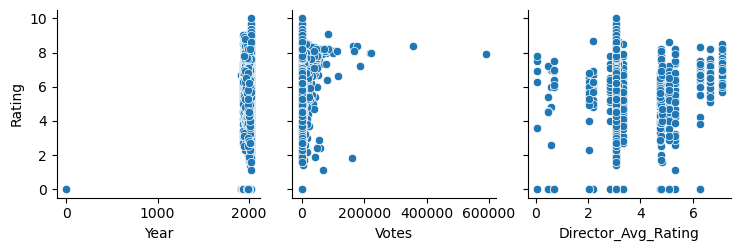

In [15]:
import seaborn as sns


sns.pairplot(df, x_vars=['Year', 'Votes', 'Director_Avg_Rating'], y_vars='Rating', kind='scatter')
plt.show()


In [16]:
X = df[['Year', 'Votes', 'Director_Avg_Rating', 'Actor_1_Popularity']]
y = df['Rating']

In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.80)
X_pca_reduced = pca.fit_transform(X_scaled)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [23]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.2066930019675097
R-squared: 0.8710568236634045


In [24]:
y_train_pred = model.predict(x_train)
train_r2 = r2_score(y_train, y_train_pred)
print(f'Training R²: {train_r2}')

test_r2 = r2_score(y_test, y_pred)
print(f'Test R²: {test_r2}')

Training R²: 0.9746965017713379
Test R²: 0.8710568236634045
